In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define a function to apply moving average smoothing
def smooth_data(data, window_size=5):
    window = np.ones(window_size)/window_size
    return np.convolve(data, window, mode='valid')

def numpy_ewma_vectorized(data, window = 5):
    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+1)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out
# Define a function to compute a moving standard deviation
def moving_std(data, window_size=5):
    ret = np.cumsum(data, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    ret_sq = np.cumsum(data ** 2, dtype=float)
    ret_sq[window_size:] = ret_sq[window_size:] - ret_sq[:-window_size]
    return np.sqrt((ret_sq[window_size - 1:] / window_size) - (ret[window_size - 1:] / window_size) ** 2)




## UNSW_NB15

In [10]:
# List all .npy files in your data directory
dataset = "UNSW"
metric = "_losses"
data_directory = "../results/" + dataset + "/" + dataset + metric


In [11]:
fedpg_prefix = "Grassman_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_"
fedpg_npy_files = [f for f in os.listdir(data_directory) if f.startswith(fedpg_prefix) and f.endswith('.npy')]
fedpg_npy_files

['Grassman_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_30.npy',
 'Grassman_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_10.npy']

In [12]:
fedpe_prefix = "Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_"
fedpe_npy_files = [f for f in os.listdir(data_directory) if f.startswith(fedpe_prefix) and f.endswith('.npy')]
fedpe_npy_files

['Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_100.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_60.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_80.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_70.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_50.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_90.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_40.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_30.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_20.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_10.npy']

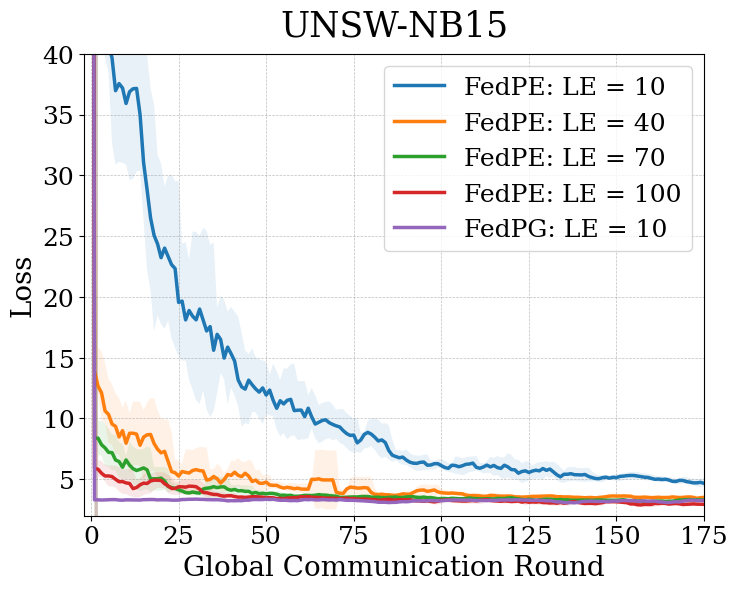

In [261]:
# Create a new figure with a specific size (in inches)
plt.figure(figsize=(8, 6))

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18
# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Define a list of colors for the lines (you may add more or modify these)
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
num_colors = 7
cmap = plt.get_cmap('Accent', num_colors)  # Replace 'viridis' with your chosen color map

# This will give you an array of RGBA colors
colors = cmap(range(num_colors))

window_size = 7

le = ['10', '40', '70', '100']
ylim = 40
k = 0
# Make a plot for each .npy file
for i in le:
    # Load the data from the .npy file
    #print(npy_file[-6:-4])
    npy_file = fedpe_prefix + i
    #if npy_file[-6:-4] == le[i]:
    data = np.load(os.path.join(data_directory, npy_file + ".npy"))
    #if data[0] > ylim:
    #    data[0] = ylim
    smooth_data_array = smooth_data(data, window_size)
    moving_std_array = moving_std(data, window_size)

    #mean= np.mean(data,axis=1)
    #std = np.std(data, axis=1)

    # Plot the smoothed data with a unique color and line style
    x = np.arange(1, len(data) - window_size + 2)  # Shift the x-axis to match the 'valid' convolution
    
    #print(x)
    #print(smooth_data_array)
    # Plot the data
    plt.plot(smooth_data_array,
             label=npy_file.replace(npy_file, "FedPE: LE = " + i),
             #color=colors[k % len(colors)],
             linewidth=2.5)
    #plt.plot(smooth_data_array, label=npy_file.replace(npy_file, "FedPE: LE = " + i), color=colors[i % len(colors)], linestyle='-')
    plt.fill_between(x,
                     smooth_data_array + moving_std_array,
                     smooth_data_array - moving_std_array,
                     #color=colors[k % len(colors)], 
                     edgecolor = None, 
                     alpha=0.1)

    k += 1

# Make a plot for each .npy file
for npy_file in fedpg_npy_files:
    # Load the data from the .npy file
    #print(npy_file[-6:-4])
    if npy_file[-6:-4] == '10':
        data = np.load(os.path.join(data_directory, npy_file))
        
        #if data[0] > ylim:
        #    data[0] = ylim

        smooth_data_array = smooth_data(data, window_size)
        moving_std_array = moving_std(data, window_size)

        # Plot the data
        #plt.plot(data, label=npy_file.replace(fedpg_prefix, "FedPG: LE = ")[:-4])

        plt.plot(smooth_data_array,
                label=npy_file.replace(npy_file, "FedPG: LE = " + '10'),
                #color=colors[k % len(colors)],
                linewidth=2.5)
        #plt.plot(smooth_data_array, label=npy_file.replace(npy_file, "FedPE: LE = " + i), color=colors[i % len(colors)], linestyle='-')
        plt.fill_between(x,
                        smooth_data_array + moving_std_array,
                        smooth_data_array - moving_std_array,
                        #color=colors[k % len(colors)], 
                        edgecolor = None, 
                        alpha=0.1)


# Add a legend, labels and a title
plt.legend(loc='best', fontsize=18)  # Let matplotlib decide the best place for the legend
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('UNSW-NB15', fontsize= 25, y = 1.02)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([-2, 175])
plt.ylim([2, 40])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Show the plot
#plt.tight_layout()  # This ensures that none of the labels are cut off

# Saving the figure as a high-quality PDF
plt.savefig('Unsw_Convergence.pdf', dpi=300, bbox_inches='tight')

plt.show()

## TON_IoT

In [13]:
# List all .npy files in your data directory
dataset = "TON"
metric = "_losses"
data_directory = "../results/" + dataset + "/" + dataset + metric


In [14]:
fedpg_prefix = "Grassman_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_"
fedpg_npy_files = [f for f in os.listdir(data_directory) if f.startswith(fedpg_prefix) and f.endswith('.npy')]
fedpg_npy_files

['Grassman_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_30.npy',
 'Grassman_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_10.npy']

In [15]:
fedpe_prefix = "Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_"
fedpe_npy_files = [f for f in os.listdir(data_directory) if f.startswith(fedpe_prefix) and f.endswith('.npy')]
fedpe_npy_files

['Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_100.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_60.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_80.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_70.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_50.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_90.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_40.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_30.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_20.npy',
 'Euclidean_losses_dim_2_std_client_20_iter_200_lr_0.0001_sub_0.1_localEpochs_10.npy']

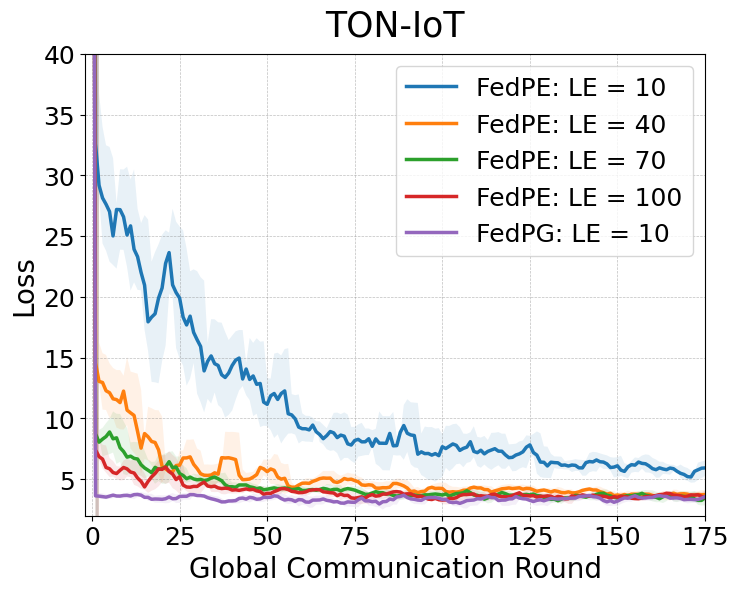

In [17]:
# Create a new figure with a specific size (in inches)
plt.figure(figsize=(8, 6))

# Customize the plot appearance
plt.rcParams['font.size'] = 18
# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Define a list of colors for the lines (you may add more or modify these)
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
num_colors = 7
cmap = plt.get_cmap('Accent', num_colors)  # Replace 'viridis' with your chosen color map

# This will give you an array of RGBA colors
colors = cmap(range(num_colors))

window_size = 5

le = ['10', '40', '70', '100']
ylim = 40
k = 0
# Make a plot for each .npy file
for i in le:
    # Load the data from the .npy file
    #print(npy_file[-6:-4])
    npy_file = fedpe_prefix + i
    #if npy_file[-6:-4] == le[i]:
    data = np.load(os.path.join(data_directory, npy_file + ".npy"))
    #if data[0] > ylim:
    #   data[0] = ylim

    smooth_data_array = smooth_data(data, window_size)
    moving_std_array = moving_std(data, window_size)

    #mean= np.mean(data,axis=1)
    #std = np.std(data, axis=1)

    # Plot the smoothed data with a unique color and line style
    x = np.arange(1, len(data) - window_size + 2)  # Shift the x-axis to match the 'valid' convolution
    
    #print(x)
    #print(smooth_data_array)
    # Plot the data
    plt.plot(smooth_data_array,
             label=npy_file.replace(npy_file, "FedPE: LE = " + i),
             #color=colors[k % len(colors)],
             linewidth=2.5)
    #plt.plot(smooth_data_array, label=npy_file.replace(npy_file, "FedPE: LE = " + i), color=colors[i % len(colors)], linestyle='-')
    plt.fill_between(x,
                     smooth_data_array + moving_std_array,
                     smooth_data_array - moving_std_array,
                     #color=colors[k % len(colors)], 
                     edgecolor = None, 
                     alpha=0.1)

    k += 1

# Make a plot for each .npy file
for npy_file in fedpg_npy_files:
    # Load the data from the .npy file
    #print(npy_file[-6:-4])
    if npy_file[-6:-4] == '10':
        data = np.load(os.path.join(data_directory, npy_file))

        #if data[0] > ylim:
        #    data[0] = ylim

        smooth_data_array = smooth_data(data, window_size)
        moving_std_array = moving_std(data, window_size)

        # Plot the data
        #plt.plot(data, label=npy_file.replace(fedpg_prefix, "FedPG: LE = ")[:-4])

        plt.plot(smooth_data_array,
                label=npy_file.replace(npy_file, "FedPG: LE = " + '10'),
                #color=colors[k % len(colors)],
                linewidth=2.5)
        #plt.plot(smooth_data_array, label=npy_file.replace(npy_file, "FedPE: LE = " + i), color=colors[i % len(colors)], linestyle='-')
        plt.fill_between(x,
                        smooth_data_array + moving_std_array,
                        smooth_data_array - moving_std_array,
                        #color=colors[k % len(colors)], 
                        edgecolor = None, 
                        alpha=0.1)


# Add a legend, labels and a title
plt.legend(loc='best', fontsize=18)  # Let matplotlib decide the best place for the legend
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('TON-IoT', fontsize= 25, y = 1.02)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([-2, 175])
plt.ylim([2, 40])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Show the plot
#plt.tight_layout()  # This ensures that none of the labels are cut off

# Saving the figure as a high-quality PDF
plt.savefig('Ton_Convergence.pdf', dpi=300, bbox_inches='tight')

plt.show()